<a href="https://colab.research.google.com/github/ovieimara/MATPMD4/blob/master/random_numbers_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Write a short python program that will generate a large number
of random numbers using the formula IK = (aIK−1 + c)mod m, where a= 1277,
c= 0, m= 131072 and I0 = 1.0.

In [2]:
#generate random number function
def generate_random_number(a, c, m, I_0, count):
  random_numbers = []
  x_arr = []
  for i in range(count):
    if i == 0:
      random_numbers.append(I_0)
      x_arr.append(random_numbers[-1])
    else:
      random_numbers.append((a * random_numbers[-1] + c) % m)
      x_arr.append(random_numbers[-2])
  return x_arr, random_numbers


In [3]:
x_arr, y_arr = generate_random_number(1277, 0, 131072, 1, 5000)
# display(result)

In [4]:
#draw histogram of above
import matplotlib.pyplot as plt
def plot_histogram(data, bin_size = 10):
  plt.hist(data, bins=bin_size)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()

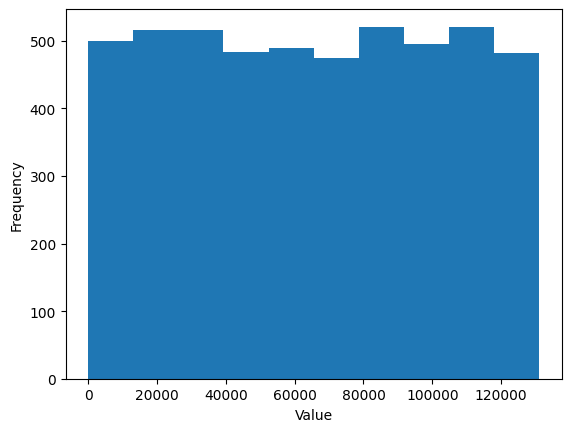

In [5]:
plot_histogram(y_arr)

In [6]:
#plot a scatter plot of the random numbers
def plot_scatter(x_arr, y_arr):
  plt.scatter(x_arr, y_arr, s=1)
  plt.show()


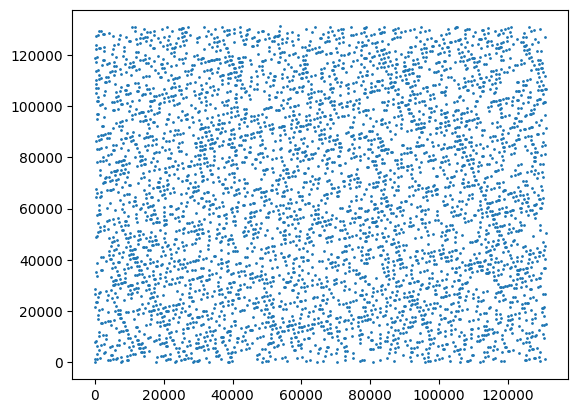

In [7]:
plot_scatter(x_arr, y_arr)

In [8]:
#generate random numbers with random.random
import random
def generate_random_numbers(count):
  random_numbers = [random.random() for _ in range(count)]
  return random_numbers

In [9]:
numbers = generate_random_numbers(5000)

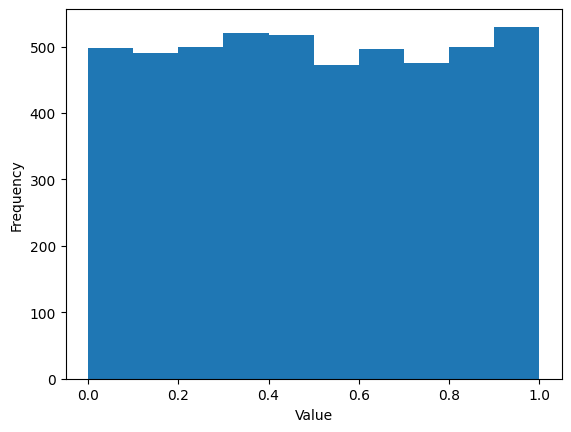

In [10]:
plot_histogram(numbers)

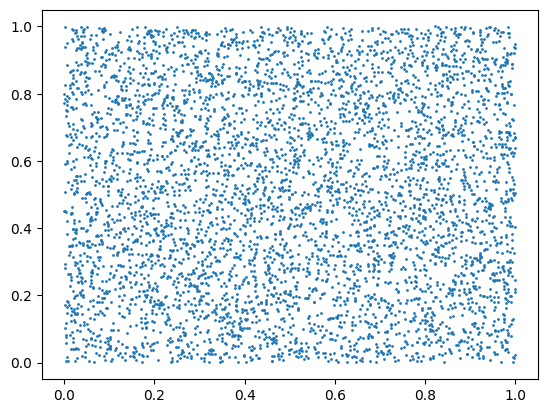

In [11]:
plot_scatter(numbers[0:4999], numbers[1:5000])

In [12]:
from scipy.stats import qmc

def generate_random_numbers_qmc(count):
  sampler = qmc.Sobol(d=count)
  qmc_numbers = sampler.random()
  return qmc_numbers

In [13]:
random_numbers_qmc = generate_random_numbers_qmc(5000)
# random_numbers_qmc

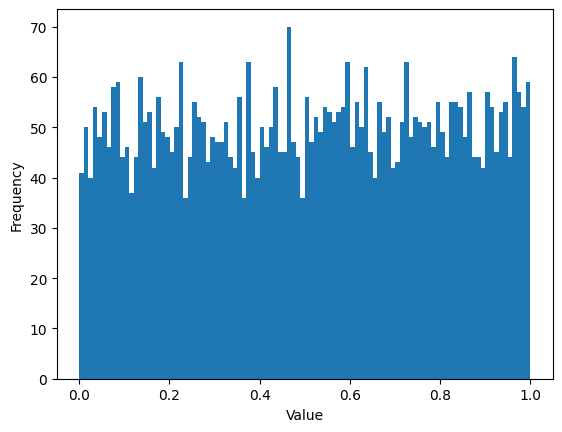

In [14]:
plot_histogram(random_numbers_qmc[0], 100)

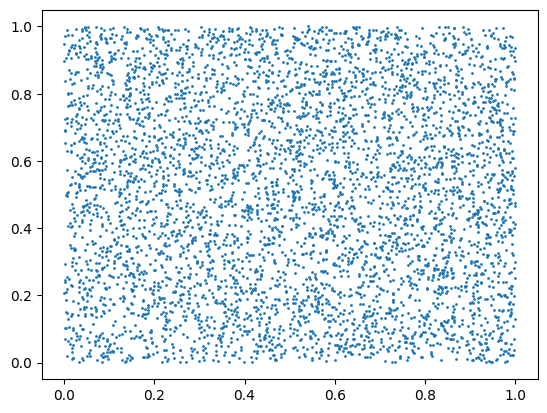

In [15]:
plot_scatter(random_numbers_qmc[0][0:4999], random_numbers_qmc[0][1:5000])

In [16]:
def generate_random_numbers_map(a, b, count):
  random_numbers = []
  def random_map():
    r = generate_random_numbers_qmc(1)[0][0]
    return a + (b - a) * r

  return [random_map() for _ in range(count)]

In [17]:
random_numbers_map = generate_random_numbers_map(2, 9, 5000)

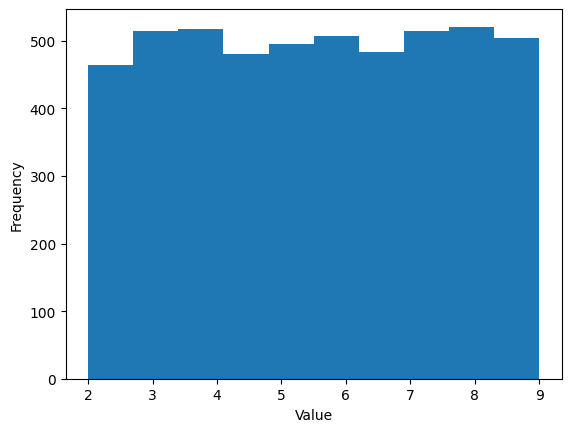

In [18]:
plot_histogram(random_numbers_map)

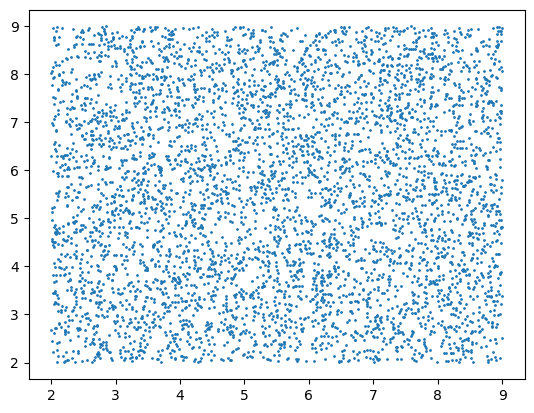

In [19]:
plot_scatter(random_numbers_map[0:4999], random_numbers_map[1:5000])

In [43]:
import numpy as np

def generate_random_numbers_uniform(num_samples):
  theta_samples = np.random.uniform(0, np.pi, num_samples)  # Generate uniform samples for theta
  x_samples = np.cos(theta_samples)  # Calculate cos(theta) for each sample
  return x_samples

In [44]:
random_numbers_normal = generate_random_numbers_uniform(5000)

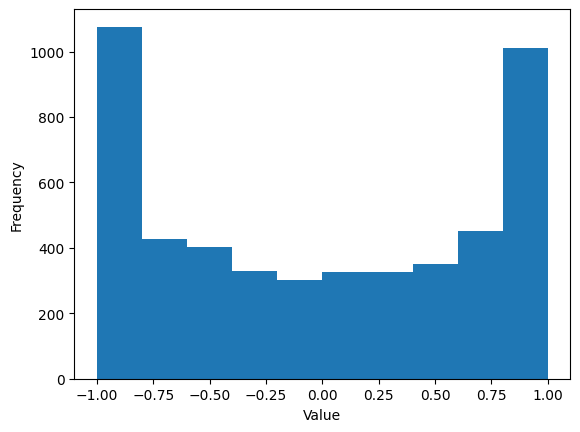

In [45]:
plot_histogram(random_numbers_normal)

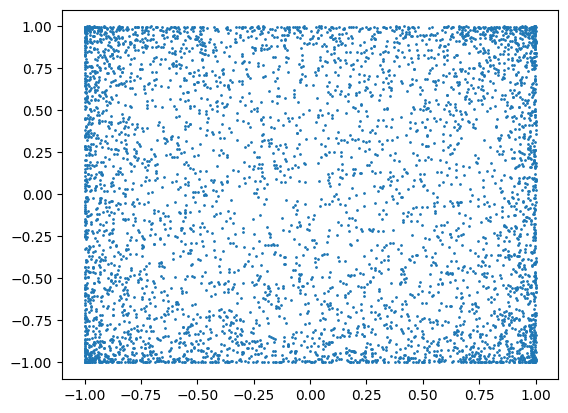

In [46]:
plot_scatter(random_numbers_normal[0:4999], random_numbers_normal[1:5000])